In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('headbrain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
type(df)

numpy.ndarray

In [4]:
X = df[:, 2]
y = df[:, -1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# X_train.shape

In [6]:
X_train = np.c_[np.ones((len(X_train), 1), dtype='int'), X_train]
X_test = np.c_[np.ones((len(X_test), 1), dtype='int'), X_test]

In [7]:
def cost_func(theta, X, y):
    m = len(X)
    pred = X.dot(theta)
    cost = (1/m) * np.sum(np.square(pred - y))
    return cost**(1/2)

In [8]:
def gradientDescent(X_train, X_test, y_train, y_test, alpha, epochs):
    m = len(y_train)
    theta = np.zeros(X_train.shape[1]).T
    print(theta)
    rmse_train = np.empty(epochs)
    rmse_test = np.empty(epochs)
    it = np.arange(epochs)
    for i in range(epochs):
        pred = np.dot(X_train, theta)
        theta = theta - (1 / m) * alpha * (X_train.T.dot((pred - y_train)))
        rmse_train[i] = cost_func(theta, X_train, y_train)
        rmse_test[i] = cost_func(theta, X_test, y_test)
    plt.plot(it, rmse_train, c='red', label='Training RMSE')
    plt.plot(it, rmse_test, c='green', label='Testing RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    print(theta)
    return theta, rmse_train, rmse_test

[0. 0.]


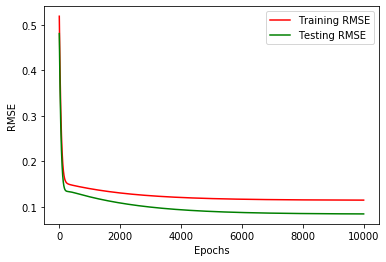

[0.14897809 0.73785191]


In [9]:
theta, rmse_train, rmse_test = gradientDescent(X_train, X_test, y_train, y_test, 0.01, 10000)

In [10]:
X_train = X_train[:, 1]


In [11]:
theta, rmse_train

(array([0.14897809, 0.73785191]),
 array([0.51893725, 0.51314535, 0.50743053, ..., 0.114697  , 0.11469685,
        0.1146967 ]))

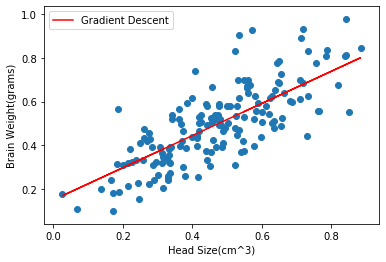

In [13]:
plt.scatter(X_train, y_train)
y_pred = theta[0] + theta[1] * X_train
plt.plot(X_train, y_pred, color='r', label='Gradient Descent', c='red')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()